In [1]:
#conda update -n base -c defaults conda

In [2]:
import os, sys, time
import glob, re
import argparse

import pandas as pd  #data frame 
import numpy as np  #numerical computation

In [3]:
os.getcwd()

'C:\\Users\\keoha\\NLP'

In [4]:
from bs4 import BeautifulSoup    #to remove tags
import nltk

#Download once if using NLTK preprocessing 
nltk.download('punkt')

#Libraries from preprocesing
#from gensim.parsing.preprocessing import remove_stopwords
import string
from nltk.stem import PorterStemmer
from nltk.tokenize import word_tokenize

#Libraries for vectorisation 
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.decomposition import LatentDirichletAllocation
from sklearn.model_selection import GridSearchCV
#from fuzzywuzzy import fuzz

#libraries for clustering
from sklearn.cluster import KMeans

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\keoha\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [5]:
#!pip install plotly

In [6]:
# Visualization 
from matplotlib import pyplot as plt
%matplotlib inline
import plotly.express as px


In [7]:
drctry = os.getcwd()
dataDirectory = drctry + "\data_html"
dataDirectory_err = drctry + "\data_html_err"
resultDirectory = drctry + "\\results"
print(resultDirectory)
print(dataDirectory_err)
print(dataDirectory)

C:\Users\keoha\NLP\results
C:\Users\keoha\NLP\data_html_err
C:\Users\keoha\NLP\data_html


# Concepts Summary
Bag of Words(BoW) - it counts the words in a document (tally). The word counts allow us to compare documents and gauge their similarity for applications like search, document classification, and topic modeling. Considered a method for preparing deep-learning net. Before being fed to the neural network, each vector of wordcounts is normalized so that all elemnts of the vector add up to 1 thus converting the frequency of words to represent the probabilities of occurence. Probabilites that surpass a certain threshold will activate nodes which influence the documents classification. Produces one number per word (count).

Word2Vec(embedding words aapproach) - It produces one vector per word. It is great for digging into documents and identifying content and subsets of content. Its vectors represent each word's contect, the ngrams of which it is a part. 2- layer neural network that processes text by "vectorizing" words. Outputs feature vectors that represent words within the corpus. Word2Vec is not a deep neural network but it turns text into a numerical form that deep neural networks can understand. Its purpose is to group the vectors of similar words together in vectorspace(detect similarities mathematically). Produces vector per word. 

Tokens - the result from tokenization which divides strings into lists of substrings. Can be used to find words and punctuation in a string.

Stemming - the process of producing morphologial variants of a root/base word. Created so that variants can be identifyied and tallied appropriately. 

Stopwords - it is a commonly used word that is more for grammatical purposes then for revealing content. Thus we would not want these words to take up valuable processing time. We remove them by storing a list of words that you consider stop words. 

TF-ID (Term frequency - Inverse Document Frequency) - method for judging the topic of an article by the words it contains. Each word is given weight, TF-ID measures relevance not frequency. Thus word counts are replaced with a TF-ID score across the dataset. TF-ID initally foes tally occurences but stopwords are systematically discounted (Inverse Document frequency part). The more documents a word appears in, the less valuable that word is as a signal to differentiate any given document. This leaves on the frequent and distinct words as markers. The marker words are then fed into the neural net as features to determine the topic covered by the document that contains them. 

In [8]:
file_list = []
file_list_ContentsInitial = []
files = glob.glob(os.path.join(dataDirectory, "*.htm"))
for file in files:
    #adding error handling
    try: 
        with open(file, 'r') as f: 
            #read the file as a string
            print("reading file:" + file)
            contents = f.read()
            print("read:" +str(len(contents)))
            file_list_ContentsInitial.append(contents)
        file_list.append(os.path.basename(file))
    except:
        print("!error reading file-*********" + os.path.basename(file))
        pass

reading file:C:\Users\keoha\NLP\data_html\beigebook199610.htm
read:16049
reading file:C:\Users\keoha\NLP\data_html\beigebook199612.htm
read:14650
reading file:C:\Users\keoha\NLP\data_html\beigebook199701.htm
read:13206
reading file:C:\Users\keoha\NLP\data_html\beigebook199703.htm
read:14489
reading file:C:\Users\keoha\NLP\data_html\beigebook199705.htm
read:15439
reading file:C:\Users\keoha\NLP\data_html\beigebook199706.htm
read:16991
reading file:C:\Users\keoha\NLP\data_html\beigebook199708.htm
read:15259
reading file:C:\Users\keoha\NLP\data_html\beigebook199709.htm
read:15143
reading file:C:\Users\keoha\NLP\data_html\beigebook199710.htm
read:13202
reading file:C:\Users\keoha\NLP\data_html\beigebook199712.htm
read:13541
reading file:C:\Users\keoha\NLP\data_html\beigebook199801.htm
read:14786
reading file:C:\Users\keoha\NLP\data_html\beigebook199803.htm
read:16358
reading file:C:\Users\keoha\NLP\data_html\beigebook199805.htm
read:13439
reading file:C:\Users\keoha\NLP\data_html\beigebook

read:162087
reading file:C:\Users\keoha\NLP\data_html\beigebook201106.htm
read:164206
reading file:C:\Users\keoha\NLP\data_html\beigebook201107.htm
read:160234
reading file:C:\Users\keoha\NLP\data_html\beigebook201109.htm
read:163738
reading file:C:\Users\keoha\NLP\data_html\beigebook201110.htm
read:157896
reading file:C:\Users\keoha\NLP\data_html\beigebook201111.htm
read:155771
reading file:C:\Users\keoha\NLP\data_html\beigebook201201.htm
read:158211
reading file:C:\Users\keoha\NLP\data_html\beigebook201202.htm
read:160223
reading file:C:\Users\keoha\NLP\data_html\beigebook201204.htm
read:157249
reading file:C:\Users\keoha\NLP\data_html\beigebook201206.htm
read:160782
reading file:C:\Users\keoha\NLP\data_html\beigebook201207.htm
read:156382
reading file:C:\Users\keoha\NLP\data_html\beigebook201208.htm
read:162154
reading file:C:\Users\keoha\NLP\data_html\beigebook201210.htm
read:157150
reading file:C:\Users\keoha\NLP\data_html\beigebook201211.htm
read:174117
reading file:C:\Users\keoh

In [9]:
#THis is for the files encoded as utf-8 which were trouble with inital data pull
files = glob.glob(os.path.join(dataDirectory_err, "*.htm"))
for file in files:
    #adding error handling
    try: 
        with open(file, "r", encoding = "utf-8") as f: 
            #read the file as a string
            print("reading file:" + file)
            contents = f.read()
            print("read:" + str(len(contents)))
            file_list_ContentsInitial.append(contents)
        file_list.append(os.path.basename(file))
    except: 
        print("error reading file-*********" + os.path.basename(file))
        pass

reading file:C:\Users\keoha\NLP\data_html_err\beigebook201903.htm
read:154490
reading file:C:\Users\keoha\NLP\data_html_err\beigebook202003.htm
read:158024
reading file:C:\Users\keoha\NLP\data_html_err\beigebook202009.htm
read:162776
reading file:C:\Users\keoha\NLP\data_html_err\beigebook202010.htm
read:163160
reading file:C:\Users\keoha\NLP\data_html_err\beigebook202101.htm
read:160664
reading file:C:\Users\keoha\NLP\data_html_err\beigebook202103.htm
read:163640
reading file:C:\Users\keoha\NLP\data_html_err\beigebook202104.htm
read:162271
reading file:C:\Users\keoha\NLP\data_html_err\beigebook202106.htm
read:163575
reading file:C:\Users\keoha\NLP\data_html_err\beigebook202107.htm
read:161779
reading file:C:\Users\keoha\NLP\data_html_err\beigebook202109.htm
read:160873
reading file:C:\Users\keoha\NLP\data_html_err\beigebook202110.htm
read:160082
reading file:C:\Users\keoha\NLP\data_html_err\beigebook202112.htm
read:160842


In [10]:
file_list_content = []
for text in file_list_ContentsInitial:
    #strips html formatting and converts to unicode
    cleanText = BeautifulSoup(text, 'html.parser').getText()
    file_list_content.append(cleanText)

In [11]:
#generate index for each item in the corpora (in this case its just rank)
#and will be used for scoring later
file_index = []

for i in range(0,len(file_list_content)):
    file_index.append(i)
len(file_index)

201

In [12]:
#conda install -c conda-forge wordcloud

# WordCloud

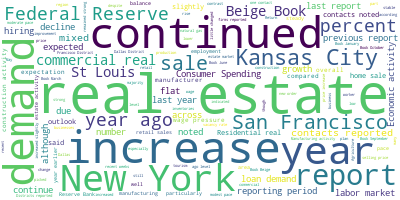

In [13]:
#import the wordcloud library
from wordcloud import WordCloud
#Join the different processed titles together
long_string = ','.join(file_list_content)
#Create WordCloud object
wordcloud = WordCloud(background_color = "white", max_words = 50000, contour_width = 3, contour_color = 'steelblue')
#Generate a word cloud
wordcloud.generate(long_string)
#Visualize the word cloud
wordcloud.to_image()

In [14]:
#wordcloud.words_   #used to figure out which of the words had the highest frequency numerically 

## Stopwords, Stemming, and Tokenization

In [15]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\keoha\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [16]:
#Load nltk's English stopwords as variables called 'stopwords'
stopwords = nltk.corpus.stopwords.words('english')
stopwords
len(stopwords)

179

In [17]:
#Load nltk's SnowballStemmer as variabled 'stemmer'
from nltk.stem.snowball import SnowballStemmer
stemmer = SnowballStemmer("english")

In [18]:
#len(stopwords)

In [19]:
stopwords

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [20]:
#text

In [21]:
#file_list_content

## Re-Run from here


In [215]:
#https://towardsdatascience.com/intro-to-nltk-for-nlp-with-python-87da6670dde
#define a tokenizer and stemmer which returns the set of stems in the text that it is passed
def tokenize_and_stem(text):
    #first tokenized by sentence, then by word to ensure that punctuation is caught as its own token 
    tokens = [word for sent in nltk.sent_tokenize(text)
             for word in nltk.word_tokenize(sent)]
    filtered_tokens = []
    #filter out any tokens not containing letters (e.g. numeric tokens, raw punctuation)
    for token in tokens:
        if re.search('[a-zA-Z]', token):
            filtered_tokens.append(token)
    stems = [stemmer.stem(t) for t in filtered_tokens]
    return stems            

C:\Users\keoha\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [216]:
def tokenize_only(text):
    #first tokenize by sentence, then by word to ensure that punctuation is caught as its own token 
    tokens = [word.lower() for sent in nltk.sent_tokenize(text)
             for word in nltk.word_tokenize(sent)]
    filtered_tokens = []
    #filter out any tokens not containing letters (e.g. numeric tokens, raw punctuation)
    for token in tokens: 
        if re.search('[a-zA-Z]', token):
            filtered_tokens.append(token)
    return filtered_tokens

C:\Users\keoha\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [217]:
totalvocab_stemmed = []
totalvocab_tokenized = []
for text in file_list_content: 
    #if text not in stopwords:#New attempt in code
        allwords_stemmed = tokenize_and_stem(text)
        totalvocab_stemmed.extend(allwords_stemmed)
        allwords_tokenized = tokenize_only(text)
        totalvocab_tokenized.extend(allwords_tokenized)
    

C:\Users\keoha\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [218]:
len(totalvocab_stemmed)
#totalvocab_stemmed

C:\Users\keoha\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


1729852

In [219]:
len(totalvocab_tokenized)
#totalvocab_tokenized

C:\Users\keoha\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


1729852

In [220]:
#define a tokenizer and stemmer which returns the set of stems in the text that it is passed
#def S_tokenize_and_stem(stopwords):
#    #first tokenized by sentence, then by word to ensure that punctuation is caught as its own token 
#    tokens = [word for sent in nltk.sent_tokenize(stopwords)
#             for word in nltk.word_tokenize(sent)]
#    filtered_tokens = []
#    #filter out any tokens not containing letters (e.g. numeric tokens, raw punctuation)
#    for token in tokens:
#        if re.search('[a-zA-Z]', token):
#            filtered_tokens.append(token)
#    stems = [stemmer.stem(t) for t in filtered_tokens]
#    return stems   

C:\Users\keoha\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [221]:
#def S_tokenize_only(stopwords):
#    #first tokenize by sentence, then by word to ensure that punctuation is caught as its own token 
#    tokens = [word.lower() for sent in nltk.sent_tokenize(stopwords)
#             for word in nltk.word_tokenize(sent)]
#    filtered_tokens = []
#    #filter out any tokens not containing letters (e.g. numeric tokens, raw punctuation)
#    for token in tokens: 
#        if re.search('[a-zA-Z]', token):
#            filtered_tokens.append(token)
#    return filtered_tokens

C:\Users\keoha\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [222]:
#sw_string = ','.join(stopwords)
#
#stopwords_stemmed = []
#stopwords_tokenized = []
#for word in sw_string: 
#    #if text not in stopwords:#New attempt in code
#        swords_stemmed = S_tokenize_and_stem(sw_string)
#        stopwords_stemmed.extend(swords_stemmed)
#        swords_tokenized = S_tokenize_only(sw_string)
#        stopwords_tokenized.extend(swords_tokenized)
#    

C:\Users\keoha\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [223]:
#for i in totalvocab_tokenized: 
#    if i not in stopwords:
#        totalvocab_tokenized.append(i)
#len(totalvocab_tokenized)
#len(stopwords)
#for i in stopwords:
#len(stopwords_tokenized)

C:\Users\keoha\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [224]:
#len(stopwords_stemmed)

C:\Users\keoha\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [225]:
vocab_frame = pd.DataFrame({'words': totalvocab_tokenized},
                          index = totalvocab_stemmed)

C:\Users\keoha\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [226]:
vocab_frame

C:\Users\keoha\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,words
frb,frb
beig,beige
book,book
summari,summary
octob,october
...,...
constitut,constitution
avenu,avenue
n.w.,n.w.
washington,washington


In [227]:
#for index in vocab_frame:
#    if index not in stopwords:
#        vocab_frame.append(index)

C:\Users\keoha\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [228]:
#sw_frame = pd.DataFrame({'words': stopwords_tokenized},
#                          index = stopwords_stemmed)

C:\Users\keoha\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [229]:
#sw_frame

C:\Users\keoha\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [230]:
#vocab_frame[~vocab_frame.words.isin(sw_frame.words)]  #This results in the removal of 591,572 stopwords

C:\Users\keoha\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


# Vectorization using TF-IDF

In [231]:
from sklearn.feature_extraction.text import TfidfVectorizer
#Turn our cleaned tet into numerical data so that we can perform statistical analysis on it. 
tfidf_vec = TfidfVectorizer(max_df = 0.8, max_features = 200000, 
                          min_df = 0.2, stop_words = stopwords, #originally = 'english'
                          use_idf = True, tokenizer = tokenize_and_stem, ngram_range = (1,3))   #Originally tokenize_and_stem

tfidf_matrx = tfidf_vec.fit_transform(file_list_content)

C:\Users\keoha\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
C:\Users\keoha\anaconda3\lib\site-packages\sklearn\feature_extraction\text.py:388: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ["'d", "'s", 'atlant', 'befor', 'c', 'charact', 'doe', 'ea', 'ear', 'employ', 'feder', 'jun', 'lea', 'louisregion', 'louisvil', 'merchandi', 'might', 'minneapolis-st', 'must', "n't", 'need', 'nonfin', 'onc', 'onli', 'ourselv', 'plea', 'profess', 'purcha', 'r', 'repr', 'reserv', 'sha', 'signif', 'st', 'themselv', 'u.', 'whi', 'wholes', 'wo', 'yourselv'] not in stop_words.
  warnings.warn('Your stop_words may be inconsistent with '


# Distance Measure

In [232]:
tfidf_matrx.shape

C:\Users\keoha\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


(201, 1706)

In [233]:
print(tfidf_matrx[0])

  (0, 1172)	0.04905861907866676
  (0, 392)	0.0735542289942149
  (0, 537)	0.07876738529137153
  (0, 36)	0.04905861907866676
  (0, 910)	0.07477816618896393
  (0, 1277)	0.08021910742639059
  (0, 722)	0.06961305670385623
  (0, 909)	0.11792442848734937
  (0, 1696)	0.0633989679631408
  (0, 968)	0.06011104575051876
  (0, 1197)	0.05678413989977125
  (0, 1329)	0.05934047824791446
  (0, 1196)	0.0986671341949198
  (0, 1133)	0.0735542289942149
  (0, 764)	0.14237382031764179
  (0, 758)	0.1436077575192899
  (0, 1233)	0.05972338364403624
  (0, 391)	0.0642780795691304
  (0, 1591)	0.07948480535292426
  (0, 326)	0.07948480535292426
  (0, 778)	0.05821916965768132
  (0, 1023)	0.05377799294929685
  (0, 756)	0.06472710024053625
  (0, 1443)	0.07738020588517443
  (0, 1494)	0.06908856707605236
  :	:
  (0, 1320)	0.04593537481158067
  (0, 1568)	0.0564354614314142
  (0, 1638)	0.05934047824791446
  (0, 1089)	0.043096473270364484
  (0, 800)	0.07477816618896393
  (0, 1703)	0.11868095649582892
  (0, 1567)	0.076709074

C:\Users\keoha\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [234]:
#!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!May Not Need This Chuck of Code!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!
tfidf_matrx.todense()
tfidf_matrx.todense().shape
print(tfidf_matrx[200,:].toarray())
tfidf_matrx[200,:].toarray().shape

[[0.         0.         0.         ... 0.00750572 0.         0.02855312]]


C:\Users\keoha\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


(1, 1706)

# Cosine Similarity

In [235]:
from sklearn.metrics.pairwise import cosine_similarity
dist = 1 - cosine_similarity(tfidf_matrx)

C:\Users\keoha\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [236]:
dist.shape

C:\Users\keoha\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


(201, 201)

In [237]:
type(dist)

C:\Users\keoha\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


numpy.ndarray

In [238]:
df = pd.DataFrame(dist)  #changing the dist object from numpy array to dataframe

C:\Users\keoha\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [239]:
#Plotting the Matrix in Excel, revealing breaks in the document structure in addition to similarity in documents
#Already exported to excel
#df.to_excel(r"C:\Users\keoha\OneDrive\Documents\ADEC7430 Big Data Econometrics\Final.Project\cosine_v2.xlsx")

C:\Users\keoha\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [240]:
#This gives a plot similar to that which is produced in the Excel file. 

# Takes a real long time to run. Uncomment with caution
#import seaborn as sn
#import matplotlib.pyplot as plt
#sn.heatmap(dist, annot=True)
#plt.show()

C:\Users\keoha\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


# Beige Reports Dendogram Clusters

C:\Users\keoha\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


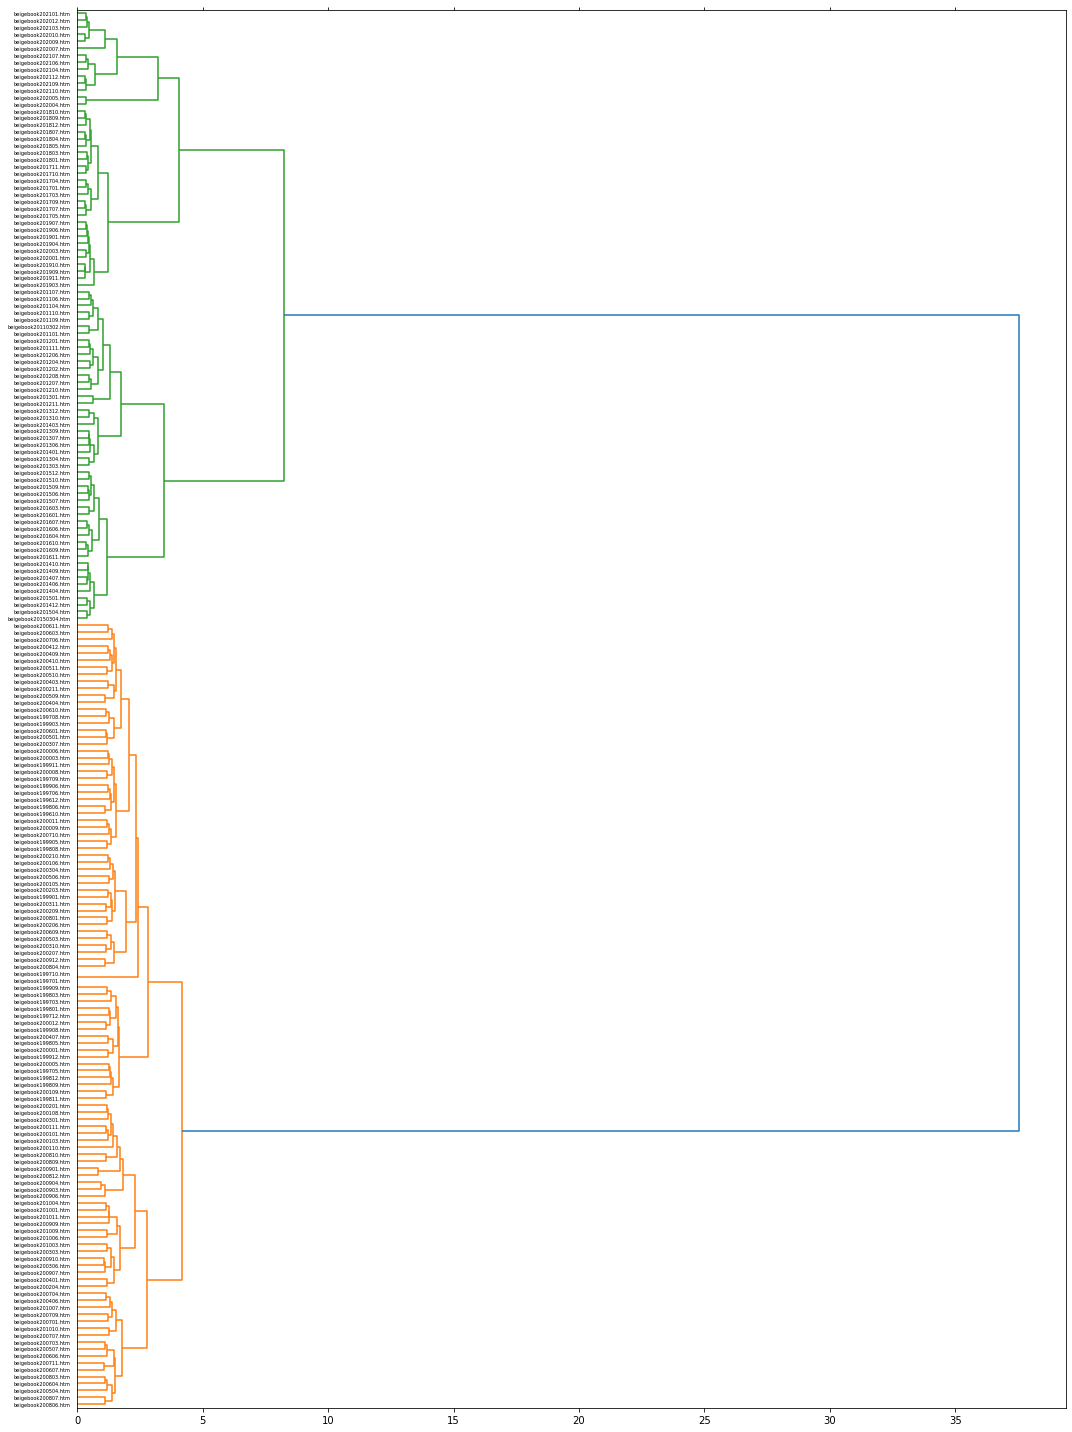

In [241]:
#Document Level Analysis
%matplotlib inline
from scipy.cluster.hierarchy import ward, dendrogram
from scipy.cluster import hierarchy

linkage_matrix = ward(dist) #define the linkage_matrix using word clustering pre-computed distances

fig, ax = plt.subplots(figsize = (15,20)) #setting the size of the plots
ax = dendrogram(linkage_matrix, orientation = "right", labels= file_list)

plt.tick_params(\
               axis = 'x'          #changes apply to x axis
               ,which = "both"     #both major and minor ticks are affected
               , bottom= "off"     # ticks along the bottom edge are off
               , top = "off"       # ticks along the top edge are off
               , labelbottom = "off" )

plt.tight_layout() #shwoing the plot in a tight layout

#Saving plot output to Jup.Notebook location
plt.savefig('ward_cluster.png', dpi = 200) #saving figure are ward_cluster

#### The initial clustering reveals that the majority of Biege Books published after 2010 were placed in one category and the Biege Books published prior to 2011 were classifier in another. 

In [242]:
#dendrogram(linkage_matrix, labels = file_list)

C:\Users\keoha\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


# K-Means Clustering

In [243]:
#Taking all the documents and clustering the documents by num_clusters by its content (5,337 words and frequencies)

from sklearn.cluster import KMeans

num_clusters = 3   #Originally 8

km = KMeans(n_clusters=num_clusters)

#%time km.fit(tfidf_matrx)
km.fit(tfidf_matrx)

clusters = km.labels_.tolist()

C:\Users\keoha\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


C:\Users\keoha\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


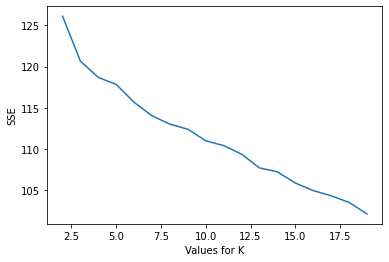

In [244]:
## NEED COMMENTARY ON WHAT THE RESULTS FROM THIS MEANS#####
#np.arrange returns evenly spaced values within a given interval. np.arange(start,stop,interval)
#Looking for Value of K at which curve flattens out to select optimal # of clusters 
sse = {}
#for k in np.arrange(2,20,1):
for k in np.arange(2,20,1): #categorize the document as Hawkish/Dovish could be 2 (both?) #Original(2,20,1)
    kmeans = KMeans(n_clusters = k, max_iter = 100).fit(tfidf_matrx)         #Need to change back to 1000
    sse[k] = kmeans.inertia_
plt.plot(list(sse.keys()),list(sse.values()))
plt.xlabel('Values for K')
plt.ylabel('SSE')
plt.show();

In [245]:
BeigeBooks = { 'fileNames': file_list, 'fileIndex': file_index,
             'contents': file_list_content, 'cluster': clusters,
             'sections': file_list}

dfBeigeBooks = pd.DataFrame(BeigeBooks, index = [clusters] , 
                           columns = ['fileIndex', 'fileNames', 'cluster', 'sections'])

C:\Users\keoha\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [246]:
dfBeigeBooks.describe()

C:\Users\keoha\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,fileIndex,cluster
count,201.000000,201.000000
mean,100.000000,1.074627
std,58.167861,0.894093
min,0.000000,0.000000
25%,50.000000,0.000000
50%,100.000000,1.000000
75%,150.000000,2.000000
max,200.000000,2.000000


In [247]:
terms = tfidf_vec.get_feature_names()

C:\Users\keoha\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [248]:
terms

C:\Users\keoha\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


["'s 's",
 "'s 's map",
 "'s co-op",
 "'s co-op condo",
 "'s hous",
 "'s inflat",
 "'s inflat unit",
 "'s key",
 "'s map",
 "'s map a-z",
 '16,1998beig',
 '16,1998beig 22,1997beig',
 '16,1998beig 22,1997beig 1996beig',
 '1996beig',
 '1996beig monetari',
 '1996beig monetari polici',
 '22,1997beig',
 '22,1997beig 1996beig',
 '22,1997beig 1996beig monetari',
 'a-z',
 'a-z index',
 'a-z index career',
 'abat',
 'abil',
 'abl',
 'abnorm',
 'aboutth',
 'aboutth news',
 'aboutth news event',
 'above-averag',
 'absorb',
 'absorpt',
 'acceler',
 'accept',
 'access disclaim',
 'access disclaim websit',
 'access updat',
 'accommod',
 'acquisit',
 'acr',
 'act',
 'add',
 'add worker',
 'adequ',
 'adjust',
 'administr',
 'advanc',
 'advanc aboutth',
 'advanc aboutth news',
 'advantag',
 'advers',
 'advertis',
 'advisori',
 'aerospac',
 'afford',
 'aggreg',
 'aggress',
 'air',
 'airport',
 'alabama',
 'albeit',
 'allow',
 'alreadi',
 'altern',
 'aluminum',
 'amid',
 'amount',
 'ampl',
 'analysi',
 '

In [251]:
from __future__ import print_function
print("Top Terms Per Cluster")
print()
order_centroids = km.cluster_centers_.argsort()[:, ::-1]
for i in range(num_clusters):
    print("Cluster %d words:" % i, end = '')
    for ind in order_centroids[i, :100]:
        print(' %s' % vocab_frame.loc[terms[ind].split(' ')].values.tolist()[0][0].encode('utf-8', 'ignore'), end = ',')
        print()
    print()
    print("Cluster %d fileNames:" % i, end='')
    for fileName in dfBeigeBooks.loc[i]['fileNames'].tolist():
        print(' %s' % fileName, end= '')
        print()
    print()

C:\Users\keoha\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Top Terms Per Cluster

Cluster 0 words: b'robust',
 b'expansion',
 b'accessibility',
 b'policy',
 b'strengthen',
 b'rose',
 b'stronger',
 b'grow',
 b'favorable',
 b'slower',
 b'boosted',
 b'tightening',
 b'acceleration',
 b'brisk',
 b'difficulty',
 b'increases',
 b'sluggish',
 b'damage',
 b'increases',
 b'anticipated',
 b'demand',
 b'weaker',
 b'temporary',
 b'refinancing',
 b'optimistic',
 b'demand',
 b'problems',
 b'reduced',
 b'balance',
 b'desired',
 b'temporary',
 b'incentives',
 b'inventories',
 b'modestly',
 b'raise',
 b'excess',
 b'strong',
 b'fell',
 b'decrease',
 b'uneven',
 b'increases',
 b'demand',
 b'increases',
 b'hampered',
 b'demand',
 b'strong',
 b'moderate',
 b'persisted',
 b'homebuilding',
 b'exceed',
 b'rapidly',
 b'disappointing',
 b'describes',
 b'borrowing',
 b'compensation',
 b'hurting',
 b'deposits',
 b'tighter',
 b'increases',
 b'durables',
 b'healthy',
 b'variety',
 b'energy-related',
 b'layoffs',
 b'specific',
 b'risen',
 b'reserve',
 b'reserve',
 b'federal'

In [214]:
######################################CONSERVATIVE VERSION#################################################################################################
more_stop_words = ['sector','instances','hawaii','merchants','telecommunication','motor','pastures','paper','grain','field','sports','ranchers','iron'
                   , 'ever', 'pockets','goods','overall','crop','virtually','hog','rate','shape','running','stays','global','centers',
                   'cold','surveys', 'major', 'bankers', 'projects','builders','north', 'professionals', 'brokers', 'restaurant', 'supply','sales','china',
                   'space', 'dakota', 'services', 'year-ago', 'end', 'south','fairly', 'meeting','form', 'east', 'nation',    #asia is cutpoint for 8th iteration
                 'asia', 'six', 'year-over-year', 'past', 'third', 'hospitality', 'stores', 'expressed', 'use', 'properties', 'edged'
                  , 'experienced', 'second', 'experienced', 'much', 'finding', 'cool', 'summer', 'almost', 'florida', 'items','us','rigs','generally'
                  , 'led', 'help', 'cuts', 'widely','observed','hand','twelve','notable', 'one', 'two', 'three','fourth','fifth'       #additions begin at one
                  , 'time', 'companies', 'customers', 'held', 'addition', 'attributed', 'data','starting' , 'coal', 'half', #Now just being greedy
                   'operating', 'moved', 'held', 'soybeans', 'category','page', 'institutions', 'back','openings', 'work','computers', 
                   'output', 'farmers', 'electronics', 'exports', 'yields', 'benefits', 'high-tech','appliances', 'employees', 'mining', 'imports'
                   , 'heavy','economy', 'evident', 'wheat', 'consumer', 'market','dry','commodity','commercial','occupations', 'merchandise', 'herds'
                   ,'remains', 'short', 'cattle','become','record','substantial','cotton','oil','volume','pass','ship','job','hurricanes','retailers','fuels'
                   , 'vehicle','low','leasing','care','addition','energy','signs','home','along','information','widespread','substantial','less','meanwhile'
                   ,'eighth','gulf', 'rain','coast' #End of Round 11
                   , 'health','affected','technology','development','remains','sales','factories','lumber','manufacturing','available','higher','spring'
                   ,'light','farm','agriculture','interest','textiles','ranges','types','businesses','noticeably','spending','throughout','unseasonably'
                   , 'remains', 'nonfinancial', 'staffing','available','conditions','purchasing','tourist','trend','spending','tourism','existing','price',
                   'labor','small','selected','providers','latter','airline','leads','programs','ongoing','rents','government','legal','extraction','wet',
                   'selling','consulting','buyers','shipments','production','conditions','whereas','focused','technology','visitors','remains','officials'
                   ,'hours','net','gas','current','future','interest','small','utility','price','trend','providers','above','existing','similar','would'
                   ,'mainly','community','board','fed','pace','conditions','healthcare','account','contracts','looking','factors' #End of round 12
                   , 'unchanged','announcing','margins','permits','multifamily','managers','expect','contractor','apartments','ports','car','payroll'
                   ,'year-to-date','construction','values','sees','nonresidential','residential','line','dollar','finished','freight','basis','rental'
                   ,'west','total','drought','fourth','jersey','another','final','primarily','construction','impact','executives','realtors','containers'
                   ,'gasoline','service-sector','sources','firms','seen','raw','facilities','beginning','domestic','northern','finished','even'
                   ,'effects','aircraft','case','offsetting','example','line','semiconductor','feeding','furniture','obtained','household','wholesale'
                   ,'leisure','u.s.','structural','international','staff','foreign','holding','educational','governor','searches','percentages','california'
                   ,'local','nonmanufacturing','offering','terms','drivers','costs' #End of round 13
                   , 'real','estate','upstate','across','clients','agency','applications','models','delivery','tools','online','greater','bit','trades'
                   ,'normal','industrial','engineers','europe','software','machinery','louisville','shift','applications','cargo','mall','javascript'
                   , 'remainder','agent','forward','replace','points','reflecting','segments','sharp','buildings','exploration','facing','indicate','either'
                   , 'count','manhattan','chemicals','near' #End of round 14
                   , 'fall', 'caused','warm','also','added','share','action','could','paid','review','paul','median','minneapolis-st.','likely','houston'
                   ,'maryland','recent','shale','representatives','levels','linked' #end of round 15
                   , 'furnishings', 'every','said']# 'and/or', 'any', 'moisture', 'however'] #sensible output begins at and/or
for w in more_stop_words:
    x = stemmer.stem(w)
    stopwords.append(x)

C:\Users\keoha\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [178]:
#more_stop_words = ['surveys', 'major', 'bankers', 'projects','builders','north', 'professionals', 'brokers', 'restaurant', 
#                   'space', 'dakota', 'services', 'year-ago', 'end', 'south','fairly', 'meeting','form', 'east', 'nation',    #asia is cutpoint for 8th iteration
#                    'asia', 'six', 'year-over-year', 'past', 'third', 'hospitality', 'stores', 'expressed', 'use', 'properties', 'edged'
#                  , 'experienced', 'second', 'experienced', 'much', 'finding', 'cool', 'summer', 'almost', 'florida', 'items','us','rigs','generally'
#                  , 'led', 'help', 'cuts', 'widely','observed','hand','twelve','notable', 'one', 'two', 'three','fourth','fifth'       #additions begin at one
#                  , 'time', 'companies', 'customers', 'held', 'addition', 'traffic', 'attributed', 'data','starting' , 'coal', 'half' #Now just being greedy
#                  ,'operating', 'moved', 'held', 'soybeans', 'category','page', 'institutions', 'back','openings', 'work','computers' 
#                  ,'output', 'farmers', 'electronics', 'exports', 'yields', 'benefits', 'high-tech','appliances', 'employees', 'mining', 'imports'
#                  , 'heavy','economy', 'evident', 'wheat', 'consumer', 'market','dry','commodity','commercial','occupations', 'merchandise', 'herds'
#                  ,'remains', 'short', 'cattle','become','record','substantial','cotton','oil','volume','pass','ship','job','hurricanes','retailers','fuels'
#                  , 'vehicle','low','leasing','care','addition','energy','signs','home','along','information','widespread','substantial','less','meanwhile'
#                  ,'eighth','gulf', 'rain','coast'] #End of Round 11
#                  ,'health', 'supply', 'affected','technology','development','remains','sales','factories','lumber','manufacturing','available','higher','spring'
#                  ,'demand','light','farm','agriculture','interest','textiles','ranges','types','businesses','noticeably','spending','throughout','unseasonably'
#                  , 'remains', 'nonfinancial', 'staffing','available','conditions','purchasing','tourist','trend','spending','tourism','existing','price'
#                  ,'labor','small','selected','providers','latter','airline','leads','programs','ongoing','rents','government','legal','extraction','wet'
#                  ,'selling','consulting','buyers','shipments','production','conditions','whereas','focused','technology','visitors','remains','officials',
#                    'hours','net','gas','current','future','interest','small','utility','price','trend','providers','above','existing','similar','would'
#                    ,'mainly','community','board','fed','pace','conditions','healthcare','account','contracts','looking','factors' #End of round 12
#                    , 'unchanged','announcing','margins','permits','multifamily','managers','expect','contractor','apartments','ports','car','payroll'
#                    ,'year-to-date','construction','values','sees','nonresidential','residential','line','dollar','finished','freight','basis','rental'
#                    ,'west','total','drought','fourth','jersey','another','final','primarily','construction','impact','executives','realtors','containers'
#                    ,'gasoline','service-sector','sources','firms','seen','raw','facilities','beginning','domestic','northern','finished','even'
#                    ,'effects','','aircraft','case','offsetting','example','line','semiconductor','feeding','furniture','obtained','household','wholesale'
#                    ,'leisure','u.s.','structural','international','staff','foreign','holding','educational','governor','searches','percentages','california'
#                    ,'local','nonmanufacturing','offering','terms','drivers','costs' #End of round 13
#                    , 'real','estate','upstate','across','clients','agency','applications','models','delivery','tools','online','greater','bit','trades'
#                    ,'normal','industrial','engineers','europe','software','machinery','louisville','shift','applications','cargo','mall','javascript'
#                    , 'remainder','agent','forward','replace','points','reflecting','segments','sharp','buildings','exploration','facing','indicate','either'
#                    , 'count','manhattan','chemicals','near'#End of round 14
#                    , 'fall', 'caused','warm','also','added','share','action','could','paid','review','paul','median','minneapolis-st.','likely','houston'
#                    ,'maryland','recent','shale','representatives','levels','linked']    #End of round 15
#for w in more_stop_words:
#    x = stemmer.stem(w)
#    stopwords.append(x)

C:\Users\keoha\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [179]:
#Stopwords I am not sure if I want to include
#more_stop_words = ['said', 'Reserve Bank', 'Agriculture', 'natural gas', 'oil', 'Natural Resource', 'District economic', 'Financial Service', 'Financial Institution'
#                  , 'Banking', 'Agricultural conditions', '2003Beige Book', 'Agricultural conditions', 'Book period', 'Manufacturing Manufacturing', 'healthcare', 
#                  'Home Monetary']
more_stop_words = ['francisco','san','dallas','kansas','city','richmond','chicago','louis','st.', 'st. louis'
                   'region','dallas','minneapolis','shortage','citing','cleveland','city','city','kansas',
                   'districts','kansas','since','city','york','new','new york','atlanta','chicago','philadelphia',
                   'cleveland','chicago','philadelphia','april','dallas',
                   'according','october','richmond','country','minneapolis','many',
                   'characterizes','positive','early','richmond','san','francisco','atlanta','july','september',
                   'dallas','kansas','suggest','chicago','city','during','capital','high','cleveland','soft','st.',
                   'louis','louis','atlanta','districts','skilled','boston','pickup','easing','number','june',
                   'districts','period','mentioned','boston','cleveland','saw','beige',
                   'content','calendar','boston','francisco','returned','book','summary',
                   'skip','content','limited','region','though','due','still','top','full','frb'
                   ,'plant','travel','competition','appear','holiday','winter','varied','apparel','notes'
                   ,'including','significant','little','credit','among','because','several','discounters','picked'
                   ,'ago','earlier','wages','year','weeks','auto','natural','food','lending','upward','insurance','compared'
                   ,'activity','livestock','last','harvest','delinquency','metal','automobile','dealers','show','late','input'
                   ,'says','corn','hotel','scattered','outlook','comments','filling','feedback','site'
                   ,'feedback','filling','please', 'very', 'though','next', 'contacts','respondents','picked','states',
                  'earlier', 'visits','prior', 'ahead', 'first', 'because', 'come', 'system', 'ago', '1999beige','1998beige'
                   ,'2011beige','2006beige','2013beige','2010beige','2004beige','2000beige','2014beige','2005beige','2002beige'
                   ,'2009beige','2012beige','2015beige','2008beige','2003beige','2016beige','2007beige','1997beige','2001beige'
                   ,  '2004beige','2006beige','2008beige','2000beige','2009beige','2005beige','2001beige','2010beige','2007beige'
                   ,'2011beige','1999beige','2012beige','2013beige','2014beige','2015beige','2016beige','2002beige', 'quarter', 'carolina'
                   , 'virginia', 'dakota', 'previous', ]
for w in more_stop_words:
    x = stemmer.stem(w)
    stopwords.append(x)
    
    

C:\Users\keoha\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


## Next two cells not run because stopwords were not pulled from the clustering. Causing them to not appear in their tokenized/stemmed form

In [120]:
more_stop_words = ['january','february', 'march', 'april', 'may', 'june', 'july', 'august', 'september'
                   , 'october', 'november', 'december' ]
for w in more_stop_words:
    x = stemmer.stem(w)
    stopwords.append(x)

In [121]:
#First remove the names of months, the cities and then see what type of words keep appearing
  ### book should be a stop word
    ##To be meaningful you should remove proper nouns
#add FRB cities as stopwords. Review clusters and add city names
more_stop_words = ['New York', 'Kansas City', 'San Francisco', 'Boston', 'Federal Reserve', 'Beige Book', 'St Louis', 'Book Beige', 'Book January', 
                  'Francisco District', 'Book June', 'Book March', 'Dallas District', 'Book October', 'Book September', 'Dallas', 'Book July', 'Book April',
                  'Minnesota', 'City District', 'several District', 'District reported', 'York City', 'Districts Reported', 'Book December', 'Book November',
                  'Third District', 'Atlanta Chicago', 'Richmond District', 'Richmond Atlanta', 'Philadelphia Cleveland', 'Chicago District', 'Cleveland Richmond',
                  'First District', 'Louis District', 'Minneapolis Kansas', 'Minneapolis District', 'Cleveland District', 'Chicago St', 'District economy', 'Boston New',
                  'Atlantic District', 'North Carolina', 'North Dakota', 'Minneapolis St', 'New Jersey', 'St Paul', 'many District', 'last Beige', 'Francisco reported',
                  'City Dallas', 'Louis Minneapolis', 'Fifth District', 'Montana', 'York District', 'Book August', 'Dallas reported', 'District continued', 'Philadelphia District'
                  , 'South Carolina', 'West Virginia', 'District noted', 'Districts reporting', 'District', 'Book', 'continued', 'report', 'percent', 'year ago', 
                  'commercial real', 'contacts reported', 'although', 'continued']
for w in more_stop_words:
    x = stemmer.stem(w)
    stopwords.append(x)
#Make sure to rerun totalvocab_stemmed and totalvocab_tokenized OR move these additions to the Stemming, Stopwords, Tokenization section

In [111]:
#words

In [112]:
#stopwords_stemmed = []
#stopwords_tokenized = []
#for words in stopwords:
#    SW_stemmed = tokenize_and_stem(words)
#    stopwords_stemmed.extend(SW_stemmed)
#    SW_tokenized = tokenize_only(words)
#    stopwords_tokenized.extend(SW_tokenized)

In [113]:
#stopwords_stemmed

# Topic Modeling 
Automatically clusters word groups and similar expressions that best characterize a set of documents. Topic Analysis is an example of this AI-powered text analysis which automatically detects topics from text. Within Topic Analysis there is Topic modeling which is an unsupervised technique and Topic classification which is supervised (requires training). Topic modeling automatically determines cluster words for a set of documents without the need for a predefined list of training data. Its downside is that without training, the model is not garaunteed to supply accurate results. Topic classification models are required to improve the accuracy of the results through creating a list of tags and trainning. 


In [157]:
#Installing Gensim = "Generate Similar" natural language processing library used fro Unsupervised topic mdodeling. 
!pip install --upgrade gensim

In [158]:
#Removing proper names from the text. Results in the loss of the first word from each sentence unfortunately??
import string
def strip_proppers(text):
    # first tokenize by sentence, then by word to ensure that punctuation is caught as it's own token
    tokens = [word for sent in nltk.sent_tokenize(text) for word in nltk.word_tokenize(sent) if word.islower()]
    return "".join([" "+i if not i.startswith("'") and i not in string.punctuation else i for i in tokens]).strip()

In [159]:
#strip any proper nouns (NNP) or plural proper nouns (NNPS) from a text
from nltk.tag import pos_tag

def strip_proppers_POS(text):
    tagged = pos_tag(text.split()) #use NLTK's part of speech tagger
    non_propernouns = [word for word,pos in tagged if pos != 'NNP' and pos != 'NNPS']
    return non_propernouns



In [160]:
#Latent Dirichlet Allocation implementation with Gensim
from gensim import corpora, models, similarities 

#remove proper names
preprocess = [strip_proppers(doc) for doc in file_list_content]

#%time tokenized_text = [tokenize_and_stem(text) for text in preprocess]
tokenized_text = [tokenize_and_stem(text) for text in preprocess]

#%time texts = [[word for word in text if word not in stopwords] for text in tokenized_text]
texts = [[word for word in text if word not in stopwords] for text in tokenized_text]

In [161]:
texts

[['base',
  'collect',
  'befor',
  'document',
  'summar',
  'receiv',
  'outsid',
  'commentari',
  'view',
  'expans',
  'balanc',
  'growth',
  'slow',
  'somewhat',
  'growth',
  'eastern',
  'seaboard',
  'except',
  'moder',
  'strong',
  'growth',
  'lag',
  'rest',
  '1990s',
  'improv',
  'perform',
  'increas',
  'materi',
  'pressur',
  'balanc',
  'best',
  'moder',
  'strength',
  'area',
  'boom',
  'consider',
  'variat',
  'pattern',
  'describ',
  'double-digit',
  'growth',
  'hardwar',
  'slow',
  'shoe',
  'chain',
  'strongest',
  'durabl',
  'lag',
  'pattern',
  'true',
  'describ',
  'strong',
  'women',
  "'s",
  'youth',
  'cloth',
  'ascrib',
  'strength',
  'strength',
  'sportswear',
  'weak',
  'toy',
  'target',
  'greatest',
  'strength',
  'improv',
  'gain',
  'year-earli',
  'intens',
  'optimist',
  'upcom',
  'season',
  'tax',
  'revenu',
  'moder',
  'strength',
  'demand',
  'solid',
  'mix',
  'particular',
  'strong',
  'favor',
  'incom',
  '

In [162]:
#for texts in file_list_content: 
#    allwords_stemmed = tokenize_and_stem(text)
#    totalvocab_stemmed.extend(allwords_stemmed)
#    allwords_tokenized = tokenize_only(text)
#    totalvocab_tokenized.extend(allwords_tokenized)

In [163]:
len(texts) #This results in the text object now exluding stopwords

201

In [164]:
dctnry = corpora.Dictionary(texts)
dctnry.filter_extremes(no_below=1, no_above= 0.8)
corpus = [dctnry.doc2bow(text) for text in texts]

In [165]:
corpus[0][0:]

[(0, 1),
 (1, 1),
 (2, 1),
 (3, 2),
 (4, 1),
 (5, 4),
 (6, 1),
 (7, 1),
 (8, 3),
 (9, 1),
 (10, 2),
 (11, 1),
 (12, 1),
 (13, 1),
 (14, 1),
 (15, 1),
 (16, 1),
 (17, 1),
 (18, 1),
 (19, 1),
 (20, 1),
 (21, 1),
 (22, 1),
 (23, 1),
 (24, 1),
 (25, 1),
 (26, 2),
 (27, 1),
 (28, 1),
 (29, 1),
 (30, 1),
 (31, 1),
 (32, 1),
 (33, 1),
 (34, 1),
 (35, 3),
 (36, 2),
 (37, 1),
 (38, 1),
 (39, 1),
 (40, 1),
 (41, 1),
 (42, 1),
 (43, 1),
 (44, 1),
 (45, 2),
 (46, 1),
 (47, 2),
 (48, 1),
 (49, 1),
 (50, 3),
 (51, 1),
 (52, 1),
 (53, 1),
 (54, 1),
 (55, 1),
 (56, 1),
 (57, 1),
 (58, 1),
 (59, 1),
 (60, 2),
 (61, 2),
 (62, 1),
 (63, 1),
 (64, 1),
 (65, 1),
 (66, 2),
 (67, 1),
 (68, 1),
 (69, 1),
 (70, 1),
 (71, 3),
 (72, 3),
 (73, 1),
 (74, 2),
 (75, 1),
 (76, 1),
 (77, 1),
 (78, 2),
 (79, 1),
 (80, 1),
 (81, 1),
 (82, 1),
 (83, 2),
 (84, 1),
 (85, 1),
 (86, 4),
 (87, 2),
 (88, 1),
 (89, 1),
 (90, 1),
 (91, 3),
 (92, 1),
 (93, 1),
 (94, 1),
 (95, 1),
 (96, 1),
 (97, 1),
 (98, 1),
 (99, 1),
 (100, 2),

In [166]:
lda_model = models.LdaModel(corpus, num_topics=3, id2word=dctnry, update_every=5, chunksize=10000, passes=100) #num_topics originally 5

In [167]:
themes = lda_model.print_topics(3, num_words=20)
themes

[(0,
  '0.014*"rose" + 0.012*"decreas" + 0.009*"grew" + 0.009*"optimist" + 0.008*"bank" + 0.008*"grow" + 0.008*"transport" + 0.007*"robust" + 0.007*"stronger" + 0.007*"balanc" + 0.007*"hous" + 0.007*"strengthen" + 0.007*"revenu" + 0.006*"suppli" + 0.006*"anticip" + 0.005*"slower" + 0.005*"fell" + 0.005*"reduc" + 0.005*"averag" + 0.005*"expans"'),
 (1,
  '0.011*"fell" + 0.010*"decreas" + 0.010*"reduc" + 0.009*"layoff" + 0.008*"deterior" + 0.008*"sharpli" + 0.007*"onli" + 0.006*"sluggish" + 0.006*"reduct" + 0.006*"tighten" + 0.006*"drop" + 0.005*"bank" + 0.005*"suppli" + 0.005*"stabil" + 0.005*"close" + 0.004*"delay" + 0.004*"weaker" + 0.004*"furlough" + 0.004*"financi" + 0.004*"cancel"'),
 (2,
  '0.021*"rose" + 0.015*"suppli" + 0.011*"balanc" + 0.010*"grew" + 0.010*"transport" + 0.009*"robust" + 0.008*"decreas" + 0.008*"tariff" + 0.008*"uncertainti" + 0.007*"rais" + 0.007*"chain" + 0.006*"grow" + 0.006*"fell" + 0.006*"optimist" + 0.006*"revenu" + 0.006*"disrupt" + 0.006*"anticip" + 0.00

In [168]:
themes_matrx = lda_model.show_topics(formatted=False, num_words=20)
themes_matrx = np.array(themes_matrx, dtype=object)

In [169]:
themes_matrx[2][1][12][0]

'fell'

In [170]:
#long_string = ','.join(file_list_content)
#Create WordCloud object

#wordcloud2 = WordCloud(background_color = "white", max_words = 50000, contour_width = 3, contour_color = 'steelblue')
#wordcloud2.generate(themes_matrx)
#wordcloud2.words_

In [171]:
for i in range(len(themes_matrx)):
    themes_words =''
    for j in range(len(themes_matrx[i][1])):
        themes_words = themes_words + themes_matrx[i][1][j][0] + ' '
    print('Theme ' + str(i+1) + ': ' + themes_words)

Theme 1: rose decreas grew optimist bank grow transport robust stronger balanc hous strengthen revenu suppli anticip slower fell reduc averag expans 
Theme 2: fell decreas reduc layoff deterior sharpli onli sluggish reduct tighten drop bank suppli stabil close delay weaker furlough financi cancel 
Theme 3: rose suppli balanc grew transport robust decreas tariff uncertainti rais chain grow fell optimist revenu disrupt anticip difficulti elev delay 


In [172]:
for i in range(len(themes_matrx)):
    for j in range(len(themes_matrx[i][1])):
        print(str(i+1) + ', ' + themes_matrx[i][1][j][0] + ", " + str(themes_matrx[i][1][j][1]))

1, rose, 0.013536403
1, decreas, 0.011928164
1, grew, 0.009104795
1, optimist, 0.009045973
1, bank, 0.008455167
1, grow, 0.007966848
1, transport, 0.007825055
1, robust, 0.007449659
1, stronger, 0.0071768463
1, balanc, 0.007158246
1, hous, 0.0069199647
1, strengthen, 0.006809542
1, revenu, 0.0066357595
1, suppli, 0.0064944085
1, anticip, 0.006220312
1, slower, 0.0053472565
1, fell, 0.005322875
1, reduc, 0.0050508277
1, averag, 0.005011925
1, expans, 0.0048166905
2, fell, 0.011150142
2, decreas, 0.010165293
2, reduc, 0.009907679
2, layoff, 0.008517805
2, deterior, 0.008123479
2, sharpli, 0.007985634
2, onli, 0.0074943784
2, sluggish, 0.006437392
2, reduct, 0.006390198
2, tighten, 0.0059097544
2, drop, 0.0057525374
2, bank, 0.005461405
2, suppli, 0.0054595647
2, stabil, 0.005368489
2, close, 0.0053060343
2, delay, 0.004459474
2, weaker, 0.0043211244
2, furlough, 0.004178451
2, financi, 0.004168243
2, cancel, 0.004130764
3, rose, 0.020553404
3, suppli, 0.015098759
3, balanc, 0.011013237
3

In [173]:
filename = resultDirectory + '\\BeigeBooks_LDA_Themes.txt'
f = open(filename, 'a')

for i in range(len(themes_matrx)):
    themes_words = ''
    for j in range(len(themes_matrx[i][1])):
        themes_words = themes_words + themes_matrx[i][1][j][0] + ' '
    print('Theme ' + str(i+1) + ': ' + themes_words)
    f.write('Theme ' + str(i+1) + ':, ' + themes_words)

Theme 1: rose decreas grew optimist bank grow transport robust stronger balanc hous strengthen revenu suppli anticip slower fell reduc averag expans 
Theme 2: fell decreas reduc layoff deterior sharpli onli sluggish reduct tighten drop bank suppli stabil close delay weaker furlough financi cancel 
Theme 3: rose suppli balanc grew transport robust decreas tariff uncertainti rais chain grow fell optimist revenu disrupt anticip difficulti elev delay 


In [174]:
filename = resultDirectory + '\\BeigeBooks_LDA_Themes.txt'
f = open(filename, 'a')

for i in range(len(themes_matrx)): 
    for j in range(len(themes_matrx[i][1])):
        print(str(i+1) + ', ' + themes_matrx[i][1][j][0] + ', ' + str(themes_matrx[i][1][j][1]))
        f.write(str(i+1) + ', ' + themes_matrx[i][1][j][0] + ', ' + str(themes_matrx[i][1][j][1]))
        
f.close

1, rose, 0.013536403
1, decreas, 0.011928164
1, grew, 0.009104795
1, optimist, 0.009045973
1, bank, 0.008455167
1, grow, 0.007966848
1, transport, 0.007825055
1, robust, 0.007449659
1, stronger, 0.0071768463
1, balanc, 0.007158246
1, hous, 0.0069199647
1, strengthen, 0.006809542
1, revenu, 0.0066357595
1, suppli, 0.0064944085
1, anticip, 0.006220312
1, slower, 0.0053472565
1, fell, 0.005322875
1, reduc, 0.0050508277
1, averag, 0.005011925
1, expans, 0.0048166905
2, fell, 0.011150142
2, decreas, 0.010165293
2, reduc, 0.009907679
2, layoff, 0.008517805
2, deterior, 0.008123479
2, sharpli, 0.007985634
2, onli, 0.0074943784
2, sluggish, 0.006437392
2, reduct, 0.006390198
2, tighten, 0.0059097544
2, drop, 0.0057525374
2, bank, 0.005461405
2, suppli, 0.0054595647
2, stabil, 0.005368489
2, close, 0.0053060343
2, delay, 0.004459474
2, weaker, 0.0043211244
2, furlough, 0.004178451
2, financi, 0.004168243
2, cancel, 0.004130764
3, rose, 0.020553404
3, suppli, 0.015098759
3, balanc, 0.011013237
3

<function TextIOWrapper.close()>

In [175]:
#!pip install pyLDAvis

In [176]:
import pyLDAvis
#import pyLDAvis.gensim
import pyLDAvis.gensim_models as gensimvis
import pickle 

# Visualize the topics
pyLDAvis.enable_notebook()

num_topics = 3                                                                           #Originally num_topics = 3
LDAvis_data_filepath = os.path.join('./results/ldavis_prepared_'+str(num_topics))
# # this is a bit time consuming - make the if statement True
# # if you want to execute visualization prep yourself
if 1 == 1:
    LDAvis_prepared = gensimvis.prepare(lda_model, corpus, dctnry)
    with open(LDAvis_data_filepath, 'wb') as f:
        pickle.dump(LDAvis_prepared, f)
# load the pre-prepared pyLDAvis data from disk
with open(LDAvis_data_filepath, 'rb') as f:
    LDAvis_prepared = pickle.load(f)
pyLDAvis.save_html(LDAvis_prepared, './results/ldavis_prepared_'+ str(num_topics) +'.html')
LDAvis_prepared

PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
0     -0.043483 -0.052066       1        1  62.976893
2     -0.068818  0.044783       2        1  29.708066
1      0.112301  0.007283       3        1   7.315041, topic_info=         Term         Freq        Total Category  logprob  loglift
152      fell  1138.000000  1138.000000  Default  30.0000  30.0000
531     reduc   950.000000   950.000000  Default  29.0000  29.0000
34    decreas  2045.000000  2045.000000  Default  28.0000  28.0000
241    layoff   371.000000   371.000000  Default  27.0000  27.0000
204    suppli  1705.000000  1705.000000  Default  26.0000  26.0000
..        ...          ...          ...      ...      ...      ...
87        pay    48.908694   466.884070   Topic3  -5.6500   0.3591
358  downward    44.771011   344.833214   Topic3  -5.7384   0.5737
239      hous    52.931765  1068.949049   Topic3  -5.5710  -0.3902
147    despit    48.605379   672.190640   Topic3  -5.6562  -0.0116
388     subdu    46.246618   444.182084   Topic3  -5.7060   0.3530

[272 rows x 6 columns], token_table=      Topic      Freq                                               Term
term                                                                    
5303      2  0.992967                                               20th
1500      1  0.376825                                               abil
1500      2  0.585187                                               abil
1500      3  0.035466                                               abil
6044      3  0.931863                                             abrupt
...     ...       ...                                                ...
5345      2  0.940559  www.newyorkfed.org/data-and-statistics/regiona...
5346      2  0.974823  www.philadelphiafed.org/research-and-data/regi...
5347      2  0.971595               www.research.stlouisfed.org/regecon/
6282      2  0.965567          www.richmondfed.org/research/data_analysi
5348      2  0.972452      www.richmondfed.org/research/regional_economi

[434 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[1, 3, 2])

In [ ]:
#Delete. Just has some useful commands

#sys.version
#print(tfidf_matrx)
#tfidf_matrx.shape